# Running a standardized Analysis method

Standardized analysis procedures are provided as individual classes in the :mod:`locan.analysis` module.

Here we outline the principle use of any analysis class using a mock analysis procedure - the AnalysisExampleAlgorithm_1 class.

In [1]:
from pathlib import Path

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import locan as lc
from locan.analysis.analysis_example import AnalysisExampleAlgorithm_1, AnalysisExampleAlgorithm_2

In [2]:
lc.show_versions(system=False, dependencies=False, verbose=False)


Locan:
   version: 0.7.dev7+gb690986

Python:
   version: 3.8.8


## Some localization data

In [3]:
localization_dict = {    
      'Position_x': [0, 0, 1, 4, 5],
      'Position_y': [0, 1, 3, 4, 1]
    }

df = pd.DataFrame(localization_dict)
dat = lc.LocData.from_dataframe(dataframe=df)
dat.print_summary()

identifier: "1"
comment: ""
creation_date: "2021-03-20 07:49:46 +0100"
modification_date: ""
source: DESIGN
state: RAW
element_count: 5
frame_count: 0
file_type: UNKNOWN_FILE_TYPE
file_path: ""



## Instantiating and using the Analysis class

### Instantiate the Analysis_example object

In [4]:
ae = AnalysisExampleAlgorithm_2()

Show the initialized parameters:

In [5]:
ae

AnalysisExampleAlgorithm_2(n_sample=100, seed=None)

In [6]:
ae.parameter

{'n_sample': 100, 'seed': None}

### Primary results of the analysis procedure

Some random data a and b is generated as primary result of the analysis procedure:

In [7]:
ae.compute(locdata=dat)
ae.results.head()

,a,b
0,-0.114076,0.334750
1,-0.423181,0.049962
2,-1.075575,1.068276
3,0.014107,-1.025263
4,-0.151621,-0.569986


The class provides various methods for further dealing with the primary data.

In [8]:
methods = [x for x in dir(ae) if callable(getattr(ae, x)) and not x.startswith('_')]
methods

['compute', 'plot', 'plot_2', 'plot_histogram_fit', 'report']

### Generating a plot of results

Typically the primary results are further analyzed and represented by visual representations. This can be a plot or a histogram. Secondary results may be generated e.g. by fitting the plot.

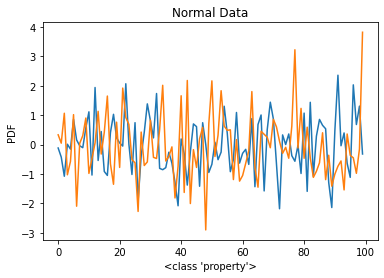

In [9]:
ae.plot()

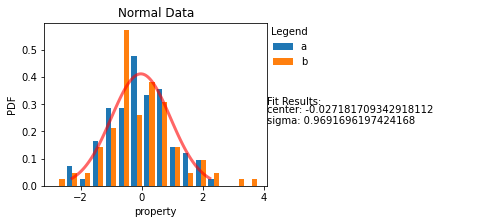

In [10]:
ae.plot_2()

After a plot or histogram has been generated secondary results may have been added as attributes.

In [11]:
attributes = [x for x in dir(ae) if not callable(getattr(ae, x)) and not x.startswith('_')]
attributes

['attribute_center',
 'attribute_sigma',
 'count',
 'meta',
 'parameter',
 'results']

In [12]:
print('Fit result:\n Center: {}\n Sigma: {}'.format(ae.attribute_center, ae.attribute_sigma))

Fit result:
 Center: -0.027181709342918112
 Sigma: 0.9691696197424168


### Generating a report

A report contains various plots, histograms and secondary results.

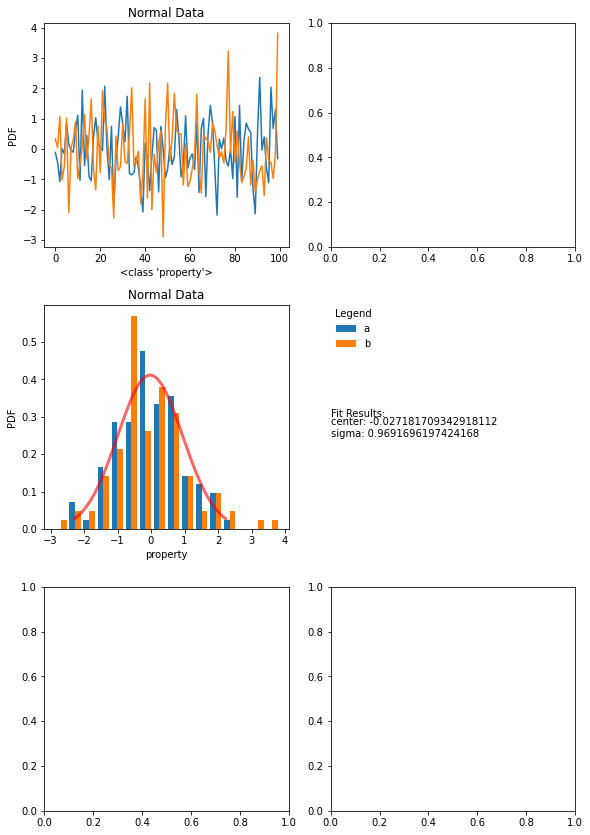

In [13]:
ae.report()

The report can be saved as pdf by providing a path:

In [14]:
# ae.report(path)

## Modifying plots for publication

### This is the original plot from the analysis class

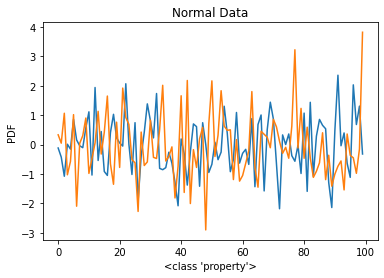

In [15]:
ae.plot()

### Save the plot in various formats

In [16]:
from pathlib import Path
temp_directory = Path('.') / 'temp'
temp_directory.mkdir(parents=True, exist_ok=True)

path = temp_directory / 'filename.pdf'
path

WindowsPath('temp/filename.pdf')

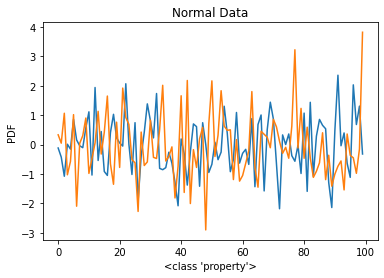

In [17]:
ae.plot()
plt.savefig(fname=path, dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1)

Delete the file an empty directory

In [18]:
path.unlink()
temp_directory.rmdir()

### Make changes to this figure

Number of axes:  1


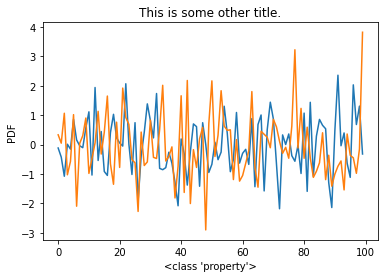

In [19]:
ae.plot()
fig = plt.gcf()
ax = fig.axes
print('Number of axes: ', len(ax))
ax[0].set_title('This is some other title.', fontsize='large')
plt.show()

### Delete axis elements

In [20]:
# fig.delaxes()

## Comparing different datasets

### Instantiate the Analysis_example objects

In [21]:
ae_1 = AnalysisExampleAlgorithm_2().compute(locdata=dat)
ae_2 = AnalysisExampleAlgorithm_2().compute(locdata=dat)

### Combine all plots in one 

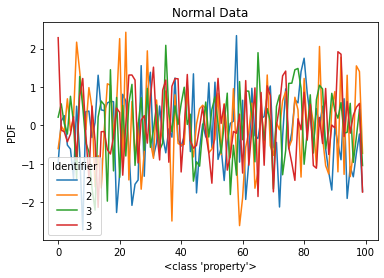

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ae_1.plot(ax=ax)
ae_2.plot(ax=ax)
legend_strings = list(ae_1.meta.identifier)*2 + list(ae_2.meta.identifier)*2
ax.legend(legend_strings, title='Identifier')
plt.show()